In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
"""
    Reading the data as a parquet file.
"""

df = pd.read_parquet('data_usage_production.parquet')

In [3]:
"""
    Printing all columns of the data.
"""

df.columns

Index(['telephone_number', 'tariff_desc', 'customer_status', 'tenure',
       'data_compl_usg_local_m2', 'data_amount_lte_m2', 'data_pack_usg_m2',
       'dpi_https_and_default_m2', 'data_pack_rev_local_m2', 'refill_total_m2',
       'dpi_tik_tok_m2', 'dpi_youtube_m2', 'dpi_instagram_m2', 'lms_rev_m2',
       'dpi_kabinetim_m2', 'dpi_tcp_signaling_m2', 'dpi_telegram_m2',
       'lastrefillamount_m2', 'data_payg_rev_local_m2', 'data_pack_usg_m3',
       'data_compl_usg_local_m3', 'data_pack_rev_local_m3', 'refill_total_m3',
       'dpi_tik_tok_m3', 'dpi_tcp_signaling_m3', 'data_payg_rev_local_m3',
       'data_pack_rev_local_m4', 'refill_total_m4', 'data_compl_usg_local_m4',
       'dpi_tik_tok_m4', 'dpi_tcp_signaling_m4', 'data_payg_rev_local_m4',
       'data_compl_usg_local_m5', 'data_pack_rev_local_m5',
       'data_payg_rev_local_m5', 'data_compl_usg_local_m6',
       'data_amount_lte_m6', 'data_pack_usg_m6', 'dpi_tcp_signaling_m6',
       'data_pack_rev_local_m6', 'data_payg_rev_l

In [4]:
"""
    Setting the index as telephone_number as mentioned in the task.
"""

df.set_index('telephone_number')

,tariff_desc,customer_status,tenure,data_compl_usg_local_m2,data_amount_lte_m2,data_pack_usg_m2,dpi_https_and_default_m2,data_pack_rev_local_m2,refill_total_m2,dpi_tik_tok_m2,...,data_tariff_revenue_m2,data_from_tariff_m3,data_tariff_revenue_m3,data_from_tariff_m4,data_tariff_revenue_m4,data_from_tariff_m5,data_tariff_revenue_m5,data_from_tariff_m6,data_tariff_revenue_m6,data_compl_usg_local_m1
telephone_number,,,,,,,,,,,,,,,,,,,,,
bCu4ClcqPl,Bolge,Active,473,33.0,33.0,4.0,1.0,1.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,944.22
K2rxyvPEu5,Azercellim,Suspended,1836,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
4XR-19v5Zy,SuperSen 1GB,Suspended,73,8.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.58
v7naSlyc_r,Azercellim,Active,2456,144.0,144.0,107.0,0.0,0.0,23.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,154.92
X2vZ1E7oa6,SuperSen 20GB,Active,2632,15315.0,15243.0,451.0,1690.0,0.0,30.0,389.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15724.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MjUf97SEIh,Bolge,Active,8920,0.0,0.0,0.0,0.0,0.0,20.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
VYi8d2very,Azercellim,Suspended,495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
MHjc-TMRHL,Bolge,Suspended,1516,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00


In [5]:
"""
    Getting an idea of the actual data columns that are important to consider while model training.
"""

print(df.nunique().sort_values())

customer_status                  2
lms_rev_m2                       4
data_from_tariff_m6              9
data_tariff_revenue_m6           9
data_tariff_revenue_m5           9
                            ...   
data_amount_lte_m6           69397
data_compl_usg_local_m6      70415
data_compl_usg_local_m5      70693
data_compl_usg_local_m1     828394
telephone_number           5189787
Length: 69, dtype: int64


In [6]:
cat_cols = []
num_cols = []

"""
    Only selecting those data features that are actually having unique values from the entire dataset.
"""

cols_to_consider = [
    'refill_total_m4',
    'istesen_data_extention_m2',
    'refill_total_m3',
    'lastrefillamount_m2',
    'tenure',
    'dpi_telegram_m2',
    'dpi_youtube_m2',
    'dpi_instagram_m2',
    'dpi_https_and_default_m2',
    'dpi_tik_tok_m2',
    'dpi_tik_tok_m3',
    'dpi_tik_tok_m4',
    'data_pack_usg_m2',
    'data_pack_usg_m3',
    'data_pack_usg_m6',
    'data_amount_lte_m2',
    'data_compl_usg_local_m2',
    'data_compl_usg_local_m3',
    'data_compl_usg_local_m4',
    'data_amount_lte_m6',
    'data_compl_usg_local_m6',
    'data_compl_usg_local_m5',
    'data_compl_usg_local_m1',
    'telephone_number'
]

for i in cols_to_consider:
    if df[i].dtype == "object":
        cat_cols.append(i)
    else:
        num_cols.append(i)

num_cols.remove('data_compl_usg_local_m1')

print('Categorical features -', cat_cols)
print('Numerical features -', num_cols)

Categorical features - ['telephone_number']
Numerical features - ['refill_total_m4', 'istesen_data_extention_m2', 'refill_total_m3', 'lastrefillamount_m2', 'tenure', 'dpi_telegram_m2', 'dpi_youtube_m2', 'dpi_instagram_m2', 'dpi_https_and_default_m2', 'dpi_tik_tok_m2', 'dpi_tik_tok_m3', 'dpi_tik_tok_m4', 'data_pack_usg_m2', 'data_pack_usg_m3', 'data_pack_usg_m6', 'data_amount_lte_m2', 'data_compl_usg_local_m2', 'data_compl_usg_local_m3', 'data_compl_usg_local_m4', 'data_amount_lte_m6', 'data_compl_usg_local_m6', 'data_compl_usg_local_m5']


In [7]:
"""
    Dropping the target value from the training set.
    Keeping the target value in y.
    This is the split.
"""

df2 = df.copy()

x_input = df.drop('data_compl_usg_local_m1', axis=1)
y_input = df2['data_compl_usg_local_m1']

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import SelectPercentile, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

num_trans = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())])

cat_trans = Pipeline(steps=[
    ("encoder", OneHotEncoder(handle_unknown="ignore")),])

preprocessor = ColumnTransformer(
transformers=[
("num", num_trans, num_cols),
("cat", cat_trans, cat_cols),])

"""
    Using a very minimal version of features and a very small regressor tree with only 50 estimators.
    The max depth is also 50 so it won't be able to capture the data properly.
    It takes me too long to train this big sample size.
    Thus I'll only use 10k samples.
    This is mentioned in the next code block.
"""

reg = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(
    n_estimators=50,
    max_depth=10,
    min_samples_leaf=5,
))])

x_train, x_test, y_train, y_test = train_test_split(x_input, y_input, test_size=0.2, random_state=0)

In [10]:
"""

Uncomment this code block to train over all the training samples.
For now keeping this as commented.
Done.

reg.fit(x_train, y_train)

print("model score: %.3f" % clf.score(x_test, y_test))
"""

'\nreg.fit(x_train, y_train)\n\nprint("model score: %.3f" % clf.score(x_test, y_test))\n'

In [16]:
"""
    Using the same code as above but training on a sample set of around 20k samples for faster training.
    Accuracy will not be the best but it validates that the pipeline works end to end.
    Done.
"""

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import SelectPercentile, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

num_trans = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())])

cat_trans = Pipeline(steps=[
    ("encoder", OneHotEncoder(handle_unknown="ignore")),])

preprocessor = ColumnTransformer(
transformers=[
("num", num_trans, num_cols),
("cat", cat_trans, cat_cols),])

"""
    Using a very minimal version of features and a very small regressor tree with only 50 estimators.
    The max depth is also 50 so it won't be able to capture the data properly.
    It takes me too long to train this big sample size.
    Thus I'll only use 10k samples.
    This is mentioned in the next code block.
"""

reg = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor())])

"""
    Training over 20k samples.
"""
x_train, x_test, y_train, y_test = train_test_split(x_input[:20000], y_input[:20000], test_size=0.2, random_state=42)

reg.fit(x_train, y_train)

print("model score: %.3f" % reg.score(x_test, y_test))

model score: 0.696


Model R² score: 0.696


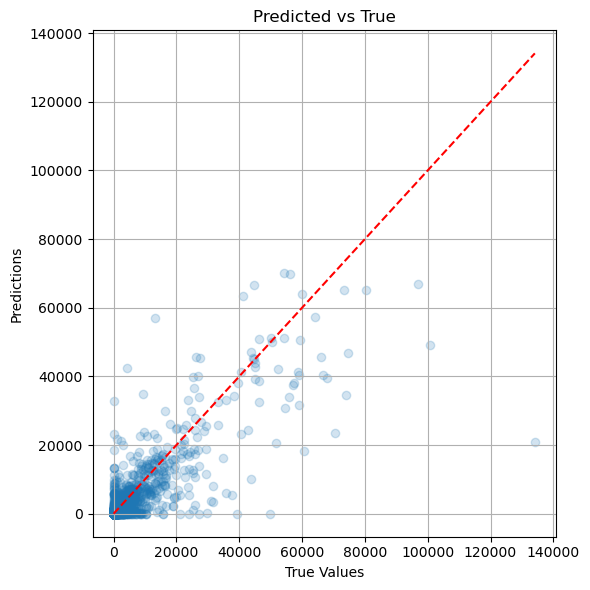

In [17]:
score = reg.score(x_test, y_test)
print("Model R² score: %.3f" % score)

y_pred = clf.predict(x_test)

"""
    Plot to plot the results.
    This is not the best fit since it was done on only 20k samples from the entire sample size.
    More data can be added to the training/test set to get a better accuracy.
    Similarly, more tuning of hyper-parameters of the random forest regressor can be done to achieve a better fit.
    Thanks.
"""
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.2)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Predicted vs True")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.grid(True)
plt.tight_layout()
plt.show()